## 데이터 살펴보기

#### 데이터 행 및 컬럼 개수 세기

In [ ]:
SELECT *
FROM robotic-century-411001.modulabs_project.data
LIMIT 10

In [ ]:
SELECT COUNT(InvoiceNo)
FROM robotic-century-411001.modulabs_project.data

#### 데이터 수 세기

In [ ]:
SELECT COUNT(InvoiceNo) as COUNT_InvoiceNo,
  Count(StockCode) as COUNT_StockCode, 
  Count(Description) as COUNT_Description,
  Count(Quantity) as COUNT_Quantity, 
  Count(InvoiceDate) as COUNT_InvoiceDate, 
  Count(UnitPrice) as COUNT_UnitPrice, 
  Count(CustomerID) as COUNT_CustomerID, 
  Count(Country) as COUNT_Country
FROM robotic-century-411001.modulabs_project.data

## 데이터 전처리 (1): 결측치 제거

In [ ]:
SELECT
    'InvoiceNo' AS column_name,
    ROUND(SUM(CASE WHEN InvoiceNo IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM robotic-century-411001.modulabs_project.data
UNION ALL
SELECT
    'StockCode' AS column_name,
    ROUND(SUM(CASE WHEN StockCode IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM robotic-century-411001.modulabs_project.data
UNION ALL
SELECT
    'Description' AS column_name,
    ROUND(SUM(CASE WHEN Description IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM robotic-century-411001.modulabs_project.data
UNION ALL
SELECT
    'Quantity' AS column_name,
    ROUND(SUM(CASE WHEN Quantity IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM robotic-century-411001.modulabs_project.data
UNION ALL
SELECT
    'InvoiceDate' AS column_name,
    ROUND(SUM(CASE WHEN InvoiceDate IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM robotic-century-411001.modulabs_project.data
UNION ALL
SELECT
    'UnitPrice' AS column_name,
    ROUND(SUM(CASE WHEN UnitPrice IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM robotic-century-411001.modulabs_project.data
UNION ALL
SELECT
    'CustomerID' AS column_name,
    ROUND(SUM(CASE WHEN CustomerID IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM robotic-century-411001.modulabs_project.data
UNION ALL
SELECT
    'Country' AS column_name,
    ROUND(SUM(CASE WHEN Country IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM robotic-century-411001.modulabs_project.data;

In [ ]:
SELECT DISTINCT Description
FROM robotic-century-411001.modulabs_project.data
WHERE StockCode = '85123A';

**이 부분의 앞 부분은 중간 오류로 인해 저장이 안되어 모두 날아갔습니다..**

후에 결과를 출력하려고 했으나, 이미 테이블의 결측값은 모두 지워진 상황이라 적절한 결과를 출력할 수 없었습니다..

다음부터는 확실하게 저장하는 습관을 들이도록 하겠습니다 ... !

In [ ]:
DELETE FROM robotic-century-411001.modulabs_project.data
WHERE CustomerID is NULL

<hr/>
<p style = "color : red">
Billing has not been enabled for this project. Enable billing at https://console.cloud.google.com/billing. DML queries are not allowed in the free tier. Set up a billing account to remove this restriction.
</p>
<hr/>

Delete를 진행하는 과정에서 위의 오류가 발생했다.
DML ( DATA MANIPULATE LANGUAGE)가 Free Teer에서는 지원하지 않기 떄문에, 결제에 대해 적용을 해달라는 의미인 것으로 해석했다.

처음에는 '해석한 내용이 사실이라면, 이 문제를 해결할 수 있을까?'라며 굉장히 당황했다.

그렇게 빅쿼리를 계속해서 확인하는 과정에 알 수 없는 데이터 셋트가 생겨난 것을 볼 수 있었다.

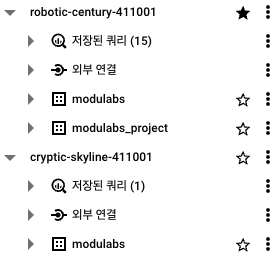

현재 본인이 사용하고 있는 데이터 세트 [robotic-century-411001]이며, 아래에 알 수 없는 데이터 세트가 생겨난 것을 확인했다.

알고보니 current dataset가 새로 생성되어 이상하게 엮여서 작동되고 있던 것 같다.
따라서 상단의 dataset를 원래 사용하던 robotic-century로 변경하고 새로고침하여 실행하니 잘 작동했다.

> 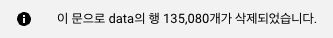

## 데이터 전처리(2): 중복값 처리

> 중복된 컬럼의 개수 세기

In [ ]:
SELECT *
FROM 
  robotic-century-411001.modulabs_project.data
GROUP BY 
  1, 2, 3, 4, 5, 6, 7, 8
HAVING 
  COUNT(*) > 1;

처음에는 구조를 이해할 수 없었으나, 모든 열을 그룹으로 묶어서 HAVING 절에서 각 그룹별로 1개보다 큰 것으로 SELECT하는 구문이다.
이전에 배울 때는 하나의 그룹으로 되어 있어서 이해하기 쉬웠으나, 모든 열을 그룹으로 묶어준다는 것이 무엇을 의미하는지 이해하기 어려웠다.

결과는 아래와 같다.

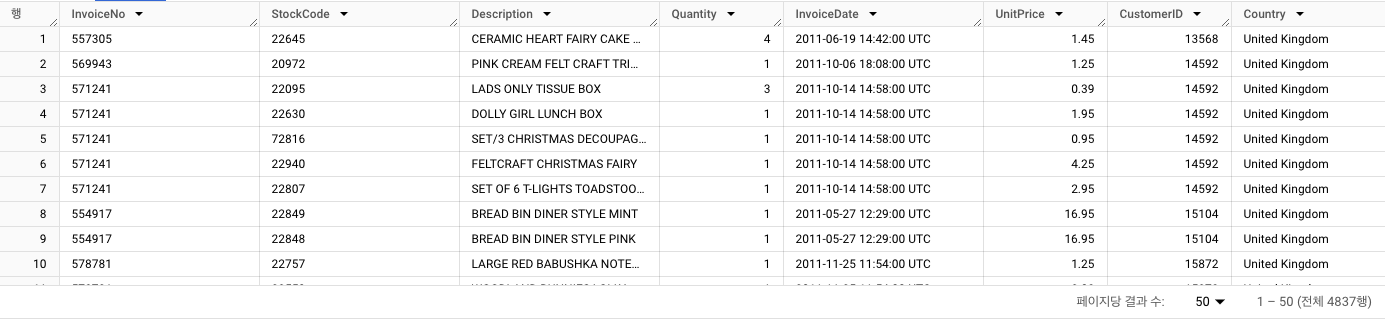

> 테이블 내에 중복값이 존재할 수 없도록 DISTINCT하게 새로 업데이트

In [ ]:
CREATE OR REPLACE TABLE robotic-century-411001.modulabs_project.data AS
SELECT DISTINCT *
FROM robotic-century-411001.modulabs_project.data

위 코드를 통해 기존 data에서 DISTINCT한 것만 SELECT하여 추출할 수 있었다.
이를 바탕으로 결과적으로 데이터의 업데이트를 중복값을 제거하는 형태로 진행할 수 있었다.

## 데이터전처리(3): 오류값 처리

> InvoiceNo의 고유값을 계산하는 문제

In [ ]:
SELECT COUNT(DISTINCT InvoiceNo)
FROM robotic-century-411001.modulabs_project.data

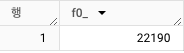

> Invoice가 C로 시작하는 것만 필터링

C는 취소된 주문을 의미한다.

In [ ]:
SELECT *
FROM robotic-century-411001.modulabs_project.data
WHERE InvoiceNo LIKE "C%"
LIMIT 100;

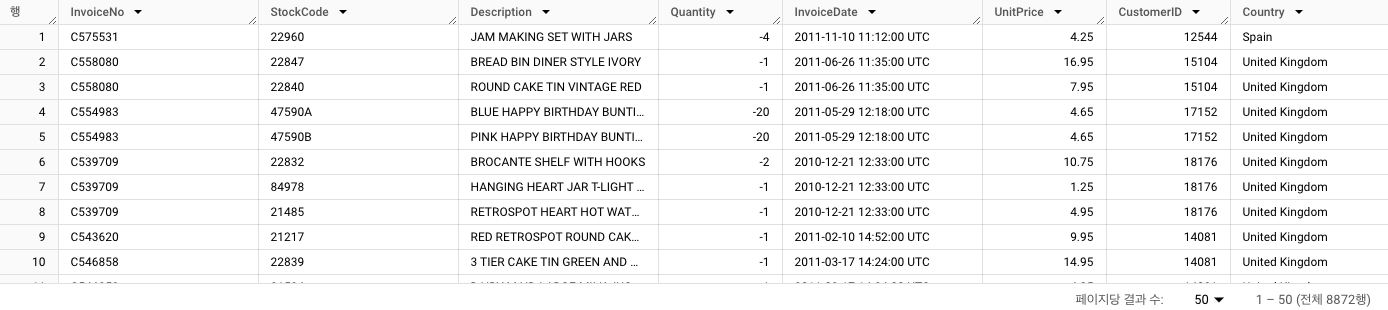

> 취소된 주문건의 비율

In [ ]:
SELECT ROUND(SUM(CASE WHEN InvoiceNo LIKE 'C%' THEN 1 ELSE 0 END) / COUNT(InvoiceNo) *100, 1)
FROM robotic-century-411001.modulabs_project.data

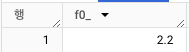

> StockCode의 고유한 값 개수 확인하기

In [ ]:
SELECT COUNT(DISTINCT StockCode)
FROM robotic-century-411001.modulabs_project.data

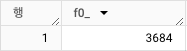

>StockCode 별 개수 세기

In [ ]:
SELECT StockCode, COUNT(*) AS sell_cnt 
FROM robotic-century-411001.modulabs_project.data
GROUP BY StockCode
ORDER BY sell_cnt DESC
LIMIT 10

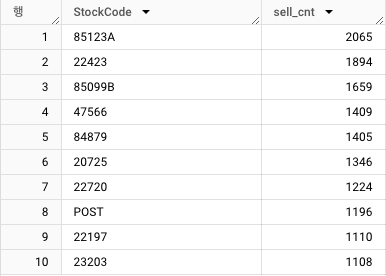
-> POST라는 이상한 값이 들어있는 것을 확인할 수 있었다.

>문자열 내의 숫자 길이 계산

In [ ]:
WITH UniqueStockCodes AS (
  SELECT DISTINCT StockCode
  FROM robotic-century-411001.modulabs_project.data
)
SELECT
  LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count,
  COUNT(*) AS stock_cnt
FROM UniqueStockCodes
GROUP BY number_count
ORDER BY stock_cnt DESC;

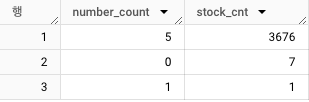

- REGEXP_REPLACE : 정규표현식 중 하나이다. REPLACE함수는 주어진 텍스트를 다른 텍스트로 대체하는 방법이다.
- LENGTH : 주어진텍스트의 길이를 세어주는 코드이다.

(위에서 사용된 방식은 StockCode의 길이는 세서 숫자를 제외한 StockCode와 뺄셈을 진행하여 숫자의 개수를 계산했다.)

> 숫자가 0~1개인 값에는 어떤 코드가 있는지 찾기

In [ ]:
SELECT DISTINCT StockCode, number_count
FROM (
  SELECT StockCode,
    LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
  FROM robotic-century-411001.modulabs_project.data
) 
WHERE number_count <= 1;

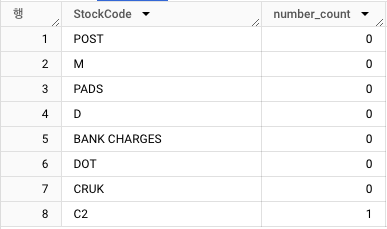

> 해당 데이터가 전체에서 몇 %에 해당하는지 계산하기

In [ ]:
SELECT ROUND(SUM(CASE WHEN number_count <= 1 THEN 1 ELSE 0 END) / COUNT(*) *100, 2)
FROM (
  SELECT StockCode,
    LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
  FROM robotic-century-411001.modulabs_project.data
) 

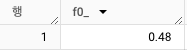

: 해당하는 StockCode들은 모두 제품거래와 관련되지 않는 문구로 보인다. 

또한 데이터의 수가 매우 적기 때문에 이러한 StockCode를 포함하는 것들은 모두 제거해도 괜찮겠다고 판단

> 제품과 관련되지 않은 거래 기록 제거

In [ ]:
DELETE FROM robotic-century-411001.modulabs_project.data
WHERE StockCode IN (
  SELECT DISTINCT StockCode
  FROM (
    SELECT * 
    FROM robotic-century-411001.modulabs_project.data 
    WHERE LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) <= 1
  )
);

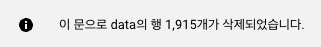
: 앞에서 주어졌던 정규표현식과 Length함수를 활용한 식을 통해 서브쿼리문을 작성하였고, 이를 바탕으로 제거해야되는 StockCode를 계산했습니다.

>Description 살펴보기

In [ ]:
SELECT DISTINCT Description
FROM robotic-century-411001.modulabs_project.data
WHERE REGEXP_CONTAINS(Description, r'[a-z]');

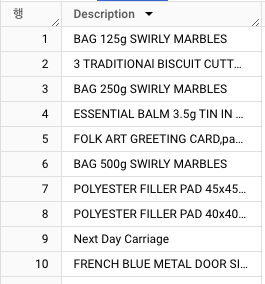

REGEXP_CONTAINS : 특정 문자열이 포함되어 있는지 확인해주는 함수, 
 포함되어 있으면 True 그렇지 않다면 False로 반환한다.

> 서비스 관련 정보를 포함하는 행들을 제거

In [ ]:
DELETE
FROM robotic-century-411001.modulabs_project.data
WHERE Description in ('Next Day Carriage','High Resolution Image')

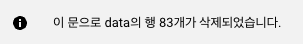

> 테이블 내의 Descrtiption을 대문자로 모두 교체하기

In [ ]:
CREATE OR REPLACE TABLE robotic-century-411001.modulabs_project.data AS
SELECT
  * EXCEPT (Description),
  REGEXP_REPLACE(Description, r'[a-z]', r'[A-Z]') AS Description 
FROM robotic-century-411001.modulabs_project.data;

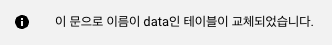

EXCEPT : 테이블에서 해당 열만 제외한 형태를 의미합니다. 주로 추가해야되는 열 수보다 제거해야되는 열 수가 적을 때 사용합니다.

> UnitPrice의 통계량 보기

In [ ]:
SELECT MIN(UnitPrice) AS min_price, MAX(UnitPrice) AS max_price, AVG(UnitPrice) AS avg_price
FROM robotic-century-411001.modulabs_project.data

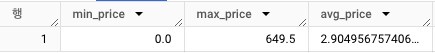

>UnitPrice가 0인 데이터의 Quantity 열 통계량 보기

In [ ]:
SELECT COUNT(Quantity) AS cnt_quantity, MIN(Quantity) AS min_quantity, MAX(Quantity) AS max_quantity, AVG(Quantity) AS avg_quantity
FROM robotic-century-411001.modulabs_project.data
WHERE UnitPrice = 0

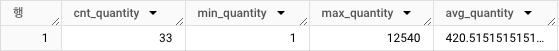

> UnitPrice가 0인 데이터 제거하기

In [ ]:
CREATE OR REPLACE TABLE robotic-century-411001.modulabs_project.data AS 
SELECT *
FROM robotic-century-411001.modulabs_project.data
WHERE UnitPrice <> 0



+ 이 부분에서 의도치 않게 UnitPrice를 0인 row만 불러오는 실수를 했습니다.
따라서 Delet문과 Create or Replace Table 함수를 재 실행하였습니다.

앞으로는 쿼리문을 다시 한 번 확인하고 스냅샷을 찍어두는 습관을 들여야겠습니다.

***방승욱 퍼실님 감사합니다 !***

## RFM 스코어 구하기

- Recency : 고객이 마지막으로 구매한 시점을 나타냅니다. 최근에 구매한 고객들은 더 자주 구매할 가능성이 높기 때문에, 최신성 점수가 높은지를 고려
- Frequency : 특정 기간 동안 고객이 얼마나 자주 우리의 제품이나 서비스를 구매하는지를 나타냅니다. 빈번하게 구매하는 고객은 충성도가 높은 고객일 확률이 높기 때문에, 빈도 점수가 높은지를 고려
- Monetary : 고객이 지출한 총 금액을 말합니다. 많은 금액을 지불한 고객일수록 더 가치가 높은 충성 고객일 수 있습니다. 앞으로도 우리의 제품과 사이트에 많은 돈을 지불할 수 있는 고객이므로, 가치 점수가 높은지를 함께 고려합니다.

### Recency
> 'YYYY-MM-DD HH:MM:SS' 형태에서 'YYYY-MM-DD' 형태로

In [ ]:
SELECT DATE(InvoiceDate) AS InvoiceDay, *
FROM project_name.modulabs_project.data;

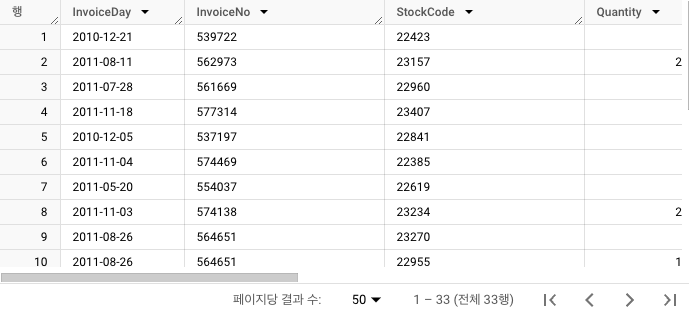

> 최근 구매월 구하기

이 부분에서 아래와 같은 오류가 발생했습니다.
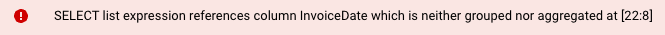

그룹화되지 않은 데이터에서는 집계함수를 사용할 수 없다는 것인데, 
당연한 것이었습니다.. 
따라서 다른 방법을 찾았습니다.

제가 생각했던 방법은 서브 쿼리를 활용하는 방법이었습니다.
하지만, Group by를 개선하기 위한 Over함수가 존재하였습니다.
아직 저는 제대로 습득하지 못했다고 생각하였기에 조금 더 찾아보았습니다.

1) OVER : 행 사이의 관계를 정의하는 함수인 WINDOW FUNCTION

2) GROUP BY : 값으로 그룹을 만들어 따로 집계함수를 적용할 수 있게됩니다.
둘 모두 집계함수를 활용하기 위한 것이나, 결과가 서로 달라진다는 것을 알 수 있었습니다.

ref: https://velog.io/@wltn716/SQL-Over-%EC%A0%88

In [ ]:
SELECT MAX(DATE(InvoiceDate)) OVER () AS most_recent_date,
        DATE(InvoiceDate) AS InvoiceDay, 
        *
FROM robotic-century-411001.modulabs_project.data

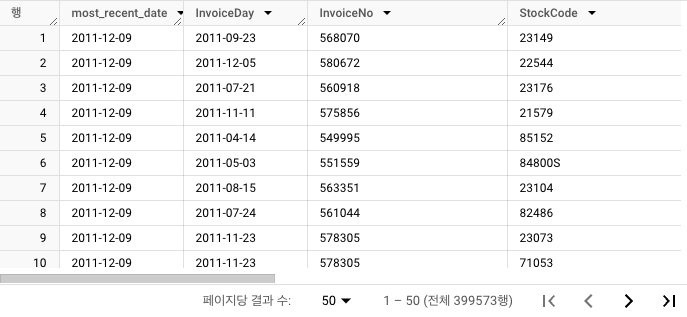

> 유저 별로 가장 큰 InvoiceDay 찾아서 최근 구매일로 저장하기

In [ ]:
SELECT CustomerID,
  MAX(InvoiceDate) AS InvoiceDay
FROM robotic-century-411001.modulabs_project.data
GROUP BY CustomerID

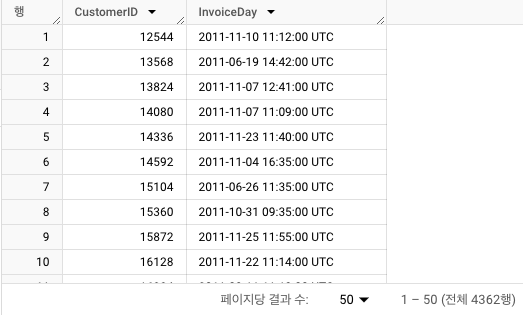

> 가장 최근 일자와 유저별 마지막 구매일 간의 차이를 계산

In [ ]:
SELECT
  CustomerID, 
  EXTRACT(DAY FROM MAX(InvoiceDay) OVER () - InvoiceDay) AS recency
FROM (
  SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
  FROM project_name.modulabs_project.data
  GROUP BY CustomerID
);

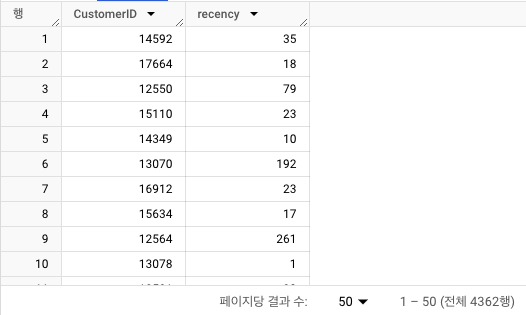

MAX(InvoiceDay) OVER () - InvoiceDay
: 이 부분은 각 고객의 각 구매일과 전체 데이터셋에서의 마지막 구매일 간의 차이를 계산합니다.

EXTRACT 함수는 위에서 계산된 날자에서 DAY 부분만 추출하여 각 고객의 최근 구매일로부터 해당 구매 건의 구매일까지의 날짜 차이를 계산해줍니다.

> 지금까지의 결과를 user_r 이라는 이름의 테이블로 저장

In [ ]:
CREATE OR REPLACE TABLE robotic-century-411001.modulabs_project.user_r AS
(SELECT
  CustomerID, 
  EXTRACT(DAY FROM MAX(InvoiceDay) OVER () - InvoiceDay) AS recency
FROM (
  SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
  FROM robotic-century-411001.modulabs_project.data
  GROUP BY CustomerID
)
);

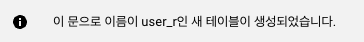

쿼리문:

```sql
SELECT * FROM robotic-century-411001.modulabs_project.user_r;
```

위 쿼리문으로 살펴본 결과 아채와 같이 테이블이 잘 생성된 것을 볼 수 있었습니다.

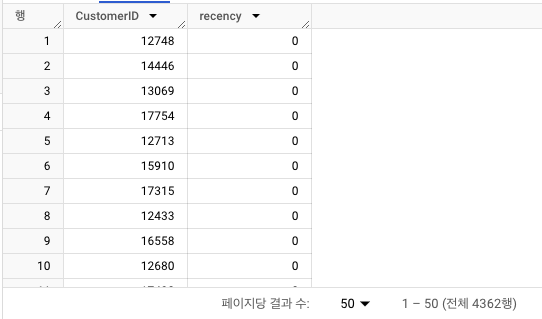

### Frequency

> 전체 거래 건수 계산하기

In [ ]:
SELECT
  CustomerID,
  COUNT(DISTINCT InvoiceNo) AS purchase_cnt
FROM robotic-century-411001.modulabs_project.data
GROUP BY CustomerID;

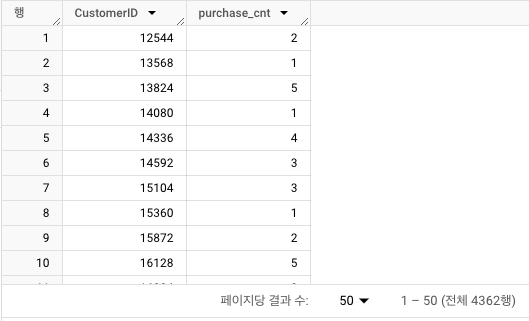

> 구매한 아이템의 총 수량 계산

In [ ]:
SELECT
  CustomerID,
  SUM(Quantity) AS item_cnt
FROM robotic-century-411001.modulabs_project.data
GROUP BY CustomerID;

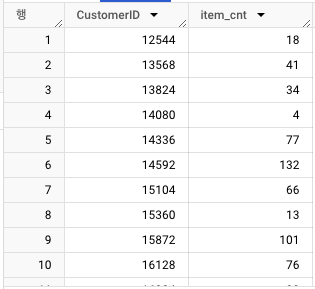

위의 결과 중에서 문제를 발견하여 수정하였습니다.
저희의 전처리 과정에서는 취소된 건에 대한 전처리를 따로 취한 것이 없습니다.
일부 데이터의 경우 Quantity값이 음수 값을 취하고 있는 것이 있었기에, 마지막 rfm 테이블에서 문제가 발생하였습니다.

따라서 위 쿼리를 아래와 같이 수정하였습니다.

In [ ]:
SELECT
  CustomerID,
  SUM(Case When Quantity > 0 THEN Quantity END) AS item_cnt
FROM robotic-century-411001.modulabs_project.data
GROUP BY CustomerID;

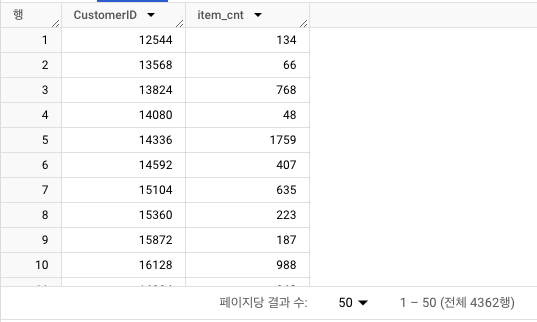

> 전체 거래 건수 계산, 구매한 아이템의 총 수량 계산을 합쳐서 user_rf라는 테이블에 저장하기

In [ ]:
CREATE OR REPLACE TABLE robotic-century-411001.modulabs_project.user_rf AS

-- (1) 전체 거래 건수 계산
WITH purchase_cnt AS ( 
  SELECT CustomerID, COUNT(DISTINCT InvoiceNo) as purchase_cnt
  FROM robotic-century-411001.modulabs_project.data
  GROUP BY CustomerID
),

-- (2) 구매한 아이템 총 수량 계산
item_cnt AS (
  SELECT CustomerID, SUM(Case When Quantity > 0 THEN Quantity END) as item_cnt
  FROM robotic-century-411001.modulabs_project.data
  GROUP BY CustomerID
)

-- 기존의 user_r에 (1)과 (2)를 통합
SELECT
  pc.CustomerID,
  pc.purchase_cnt,
  ic.item_cnt,
  ur.recency
FROM purchase_cnt AS pc
JOIN item_cnt AS ic
  ON pc.CustomerID = ic.CustomerID
JOIN robotic-century-411001.modulabs_project.user_r AS ur
  ON pc.CustomerID = ur.CustomerID;

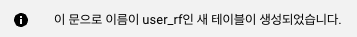

쿼리문:

```sql
SELECT * FROM robotic-century-411001.modulabs_project.user_rf;
```

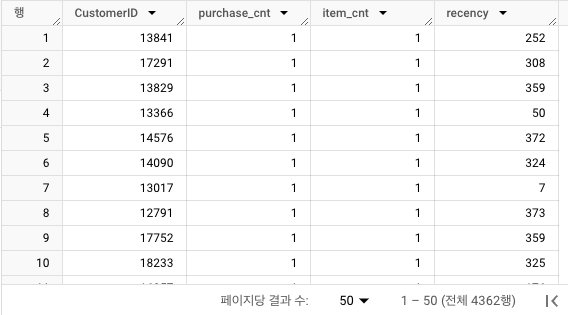

### Monetary
: 계산하는 단계에서 고객이 지불한 총 금액에 초점

> 고객별 총 지출액 계산

In [ ]:
SELECT
  CustomerID,
  ROUND(SUM(UnitPrice * Quantity), 0) AS user_total
FROM robotic-century-411001.modulabs_project.data
GROUP BY CustomerID

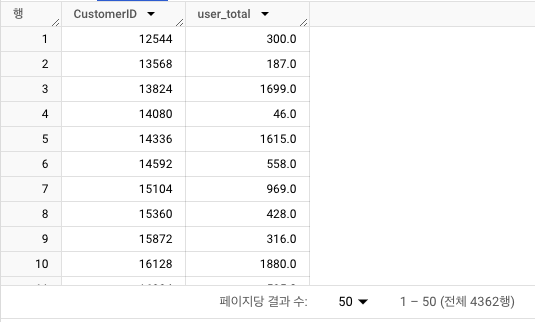

> 테이블 생성하기

In [ ]:
CREATE OR REPLACE TABLE robotic-century-411001.modulabs_project.user_rfm AS   
SELECT
  rf.CustomerID AS CustomerID,
  rf.purchase_cnt,
  rf.item_cnt,
  rf.recency,
  ut.user_total,
  ROUND(ut.user_total/rf.purchase_cnt, 0) AS user_average
FROM robotic-century-411001.modulabs_project.user_rf rf
LEFT JOIN (
  -- 고객 별 총 지출액
  SELECT
    CustomerID,
    ROUND(SUM(UnitPrice * Quantity), 0) AS user_total
  FROM robotic-century-411001.modulabs_project.data
  GROUP BY CustomerID
) ut
ON rf.CustomerID = ut.CustomerID;

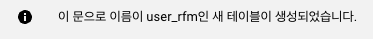

쿼리문:

```sql
select * from robotic-century-411001.modulabs_project.user_rfm
```

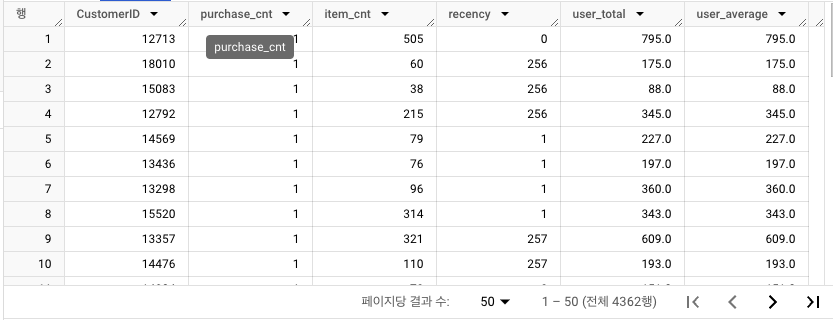

## 추가 Feature 추출

 RFM 분석 방법은 Recency, Frequency, Monetary에 의해 고객을 세그먼테이션하는 방법이지만 허점존재하기 때문에,
 
이번에는 아래와 같이 3가지 측면에서 데이터를 분석

1. 구매하는 제품의 다양성
2. 평균 구매 주기
3. 구매 취소 경향성

### 구매하는 제품의 다양성

고객 별로 구매한 상품들의 고유한 수를 계산하고, 이를 user_rfm 테이블과 결과를 합친 뒤에 user_data라는 테이블에 저장합니다.

In [ ]:
CREATE OR REPLACE TABLE robotic-century-411001.modulabs_project.user_data AS  
WITH unique_products AS (
  SELECT
    CustomerID,
    COUNT(DISTINCT StockCode) AS unique_products
  FROM robotic-century-411001.modulabs_project.data
  GROUP BY CustomerID
)
SELECT ur.*, up.* EXCEPT (CustomerID)
FROM robotic-century-411001.modulabs_project.user_rfm AS ur
JOIN unique_products AS up
ON ur.CustomerID = up.CustomerID;

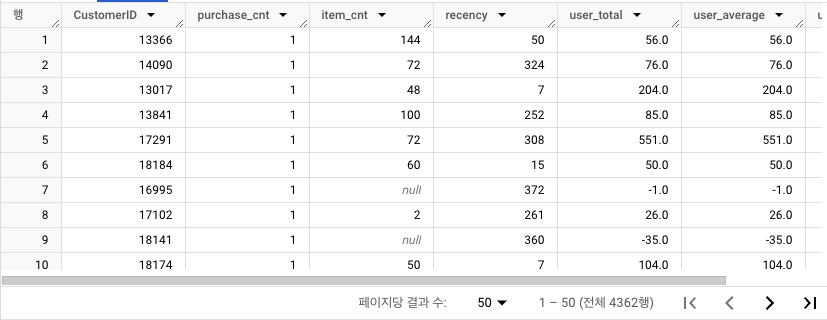


### 평균 구매 주기

평균 구매 소요 일수를 계산하고, 그 결과를 user_data에 통합해줍니다.

In [ ]:
CREATE OR REPLACE TABLE robotic-century-411001.modulabs_project.user_data AS 
WITH purchase_intervals AS (
  -- (2) 고객 별 구매와 구매 사이의 평균 소요 일수
  SELECT
    CustomerID,
    CASE WHEN ROUND(AVG(interval_), 2) IS NULL THEN 0 ELSE ROUND(AVG(interval_), 2) END AS average_interval
  FROM (
    -- (1) 구매와 구매 사이에 소요된 일수
    SELECT
      CustomerID,
      DATE_DIFF(InvoiceDate, LAG(InvoiceDate) OVER (PARTITION BY CustomerID ORDER BY InvoiceDate), DAY) AS interval_
    FROM
      robotic-century-411001.modulabs_project.data
    WHERE CustomerID IS NOT NULL
  )
  GROUP BY CustomerID
)

SELECT u.*, pi.* EXCEPT (CustomerID)
FROM robotic-century-411001.modulabs_project.user_data AS u
LEFT JOIN purchase_intervals AS pi
ON u.CustomerID = pi.CustomerID;

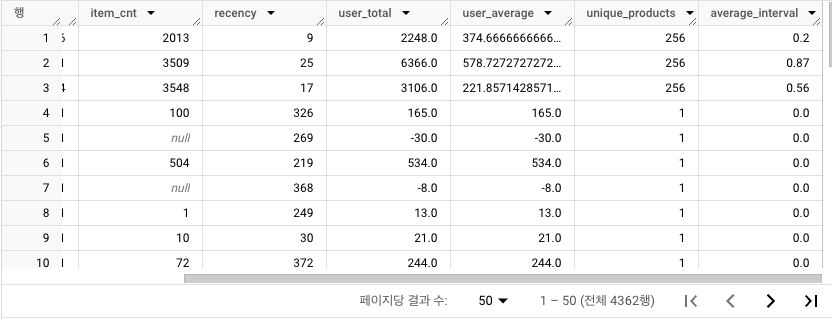

### 구매 취소 경향성

1. 취소 빈도 : 고객 별로 취소한 거래의 총 횟수
2. 취소 비율 : 각 고객이 한 모든 거래 중에서 취소를 한 거래의 비율

In [ ]:
-- 취소 빈도, 전체 거래 수 계산
SELECT
    CustomerID,
    COUNT(InvoiceNo) AS total_transactions,
    SUM(CASE WHEN InvoiceNo LIKE 'C%' THEN 1 ELSE 0 END) AS cancel_frequency
FROM robotic-century-411001.modulabs_project.data
GROUP BY CustomerID

In [ ]:
CREATE OR REPLACE TABLE robotic-century-411001.modulabs_project.user_data AS

WITH TransactionInfo AS (
SELECT
    CustomerID,
    COUNT(InvoiceNo) AS total_transactions,
    SUM(CASE WHEN InvoiceNo LIKE 'C%' THEN 1 ELSE 0 END) AS cancel_frequency
FROM robotic-century-411001.modulabs_project.data
GROUP BY CustomerID
)

SELECT u.*, t.* EXCEPT(CustomerID), ROUND(cancel_frequency/total_transactions, 2) AS cancel_rate
FROM robotic-century-411001.modulabs_project.user_data AS u
LEFT JOIN TransactionInfo AS t
ON u.CustomerID = t.CustomerID;

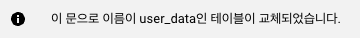

쿼리문:

```sql
select * from robotic-century-411001.modulabs_project.user_data
```

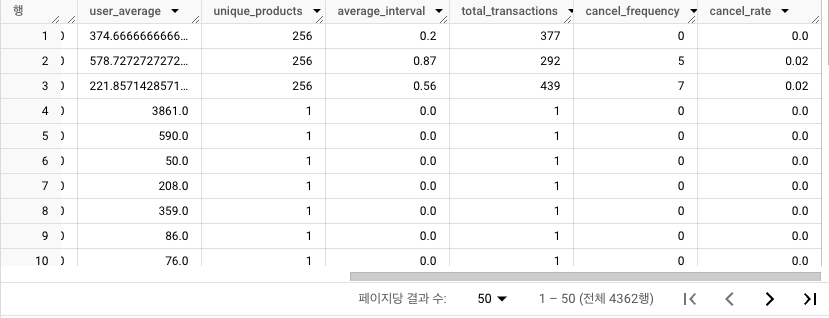

## 데이터 다운로드 및 파이썬과의 연결

- 모듈 내부에서는 되는데 여기서 안되는 것으로 보아 무언가 문제가 있는 것 같습니다. -> 경로를 수정해서 해결하였습니다.

In [14]:
import pandas as pd 
user_data = pd.read_csv('./customer_segmentation/user_data.csv')

In [15]:
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,14432,6,2013.0,9,2248.0,375.0,256,0.20,377,0,0.00
1,12428,11,3509.0,25,6366.0,579.0,256,0.87,292,5,0.02
2,13268,14,3548.0,17,3106.0,222.0,256,0.56,439,7,0.02
3,17307,1,NaN,365,-153.0,-153.0,1,0.00,1,1,1.00
4,13703,1,10.0,318,100.0,100.0,1,0.00,1,0,0.00


## 회고

일단 이번 프로젝트를 진행하면서 정말 많이 반성하게 되었습니다.
뭔가 해결되지 않는 문제들에 대해 이것을 어떻게 해결해야하는가, 그리고 이 문제를 해결하기 위해 무언가를 검색한다면, 어떻게 검색해야 원하는 Insight를 얻을 수 있는가를 고민하는데, 처음에는 제대로 생각해낼 수 없었습니다. 아무래도 지식과 노력의 부족에 의한 것이라고 판단하였습니다.

이번 프로젝트를 진행하는 과정은 정말 뱃사공과 같았습니다. 부족한 내용들을 채우고 이것을 보완하기 위해 어떻게 해야하는가를 끊임없이 생각했습니다. 
가장 큰 문제는 새로운 컬럼을 만드는 쿼리문이 많았는데, 이 쿼리문의 정답이 없기에 다 끝나고 결과를 확인하였을 때, 비로소 쿼리문의 문제점을 파악할 수 있었고 이 과정을 계속해서 반복하다 보니 어느 순간부터는 지쳐있는 저를 볼 수 있었습니다.

따라서 이번 프로젝트에서는 오류가 많이 발생했다기 보다는, 수식이나 쿼리문에 실수가 들어가서 잘못된 부분이 정말 많았습니다.

만일 아이펠 캠퍼스에서 원래 진행하던 방식으로 동일하게 프로젝트를 진행했으면 모르는 것을 팀원들에게 물어보고 서로 보완해주는 시간을 가질 수 있었을 텐데 라며 아쉬워하게 되는 순간들이었습니다.

또한 그동안 익혔다고 생각한 쿼리문들이 막상 적용하려고 보니 기억이 잘 안나서, 반복학습을 다시 해야겠다고 다짐하게 되었습니다.

하루하루, 매 시간, 매 시간 정말 매번 많은 것들을 배우고 가는 것 같습니다.

앞으로는 저도 팀원들과 함께 힘을 합쳐 어려운 문제들도 해결해낼 것이라고 다짐합니다.

제가 좋아하는 문구를 마지막으로 이번 프로젝트의 회고를 마치겠습니다.
<hr/>
### **"Despite the forecase, live like it's spring"**
<hr/>